# 什么是SVM

使得离决策边界近的点到决策边界的距离尽可能的大，即尝试寻求最优边界。

离决策边界最近的点构成了支撑向量。

### $w^Tx+b=0$
### 最大化$\frac{|w^Tx+b|}{||w||}=d$ 

### $\begin{cases}\frac{w^Tx^{(1)}+b}{||w||d} \geq 1 & \forall y^{(i)}=1 \\ \frac{w^Tx^{(1)}+b}{||w||d} \leq -1 & \forall y^{(i)}=-1 \end{cases} ; ||w||d \text{为常数}$ 

### $\begin{cases}{w_d^Tx^{(1)}+b_d} \geq 1 & \forall y^{(i)}=1 \\ {w_d^Tx^{(1)}+b_d} \leq -1 & \forall y^{(i)}=-1 \end{cases}$

### $\Longrightarrow s.t.\; y^{(i)}(w^Tx^{(1)}+b)\geq 1 \qquad min\frac12||w||^2$

### 以上为Hard Margin SVM（数据线性可分）
***

# Soft Margin 和 SVM 的正则化

### $s.t.\; y^{(i)}(w^Tx^{(1)}+b)\geq 1-\zeta_i \qquad min\frac12||w||^2$

### $\zeta_i \geq 0$代表了一定的容错空间，为了限制这个容错空间

### 引入正则项：$\quad min\frac12||w||^2 +\begin{cases} C\sum_{i=1}^{m}\zeta_i & \text{L1正则} \\ C\sum_{i=1}^{m}\zeta_i^2 & \text{L2正则}\end{cases}$

### C取值越大越偏向hard，越小容错空间越大

# 演示SVM

In [66]:
#准备数据集

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

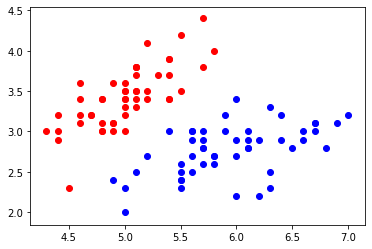

In [67]:
#查看数据散点图

plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [68]:
#对数据进行预处理

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)

In [69]:
#调用线性svm

from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_std, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [70]:
#绘制决策边界

def plot_decision_boundary(model, axis):
 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
 
    # 用预测函数预测一下
    y_predict = model.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
 
    # 然后画出图
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

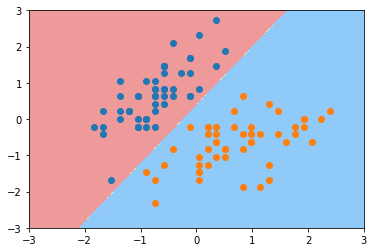

In [71]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1])
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1])
plt.show()

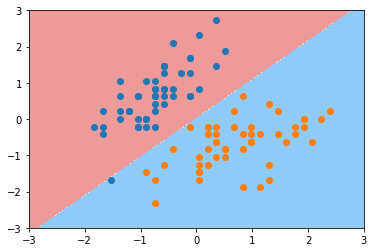

In [72]:
#增加容错空间后的结果

svc2 = LinearSVC(C=0.01)
svc2.fit(X_std, y)
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1])
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1])
plt.show()

In [73]:
svc.coef_

array([[ 4.03241632, -2.50698951]])

In [74]:
svc.intercept_

array([0.92736492])

### 改绘图函数，增加margin直线

In [75]:
def plot_svc_decision_boundary(model, axis):
 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
 
    # 用预测函数预测一下
    y_predict = model.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
 
    # 然后画出图
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up >= axis[2]) & (up <= axis[3])
    down_index = (down >= axis[2]) & (down <= axis[3])
    plt.plot(plot_x[up_index], up[up_index], color='black')
    plt.plot(plot_x[down_index], down[down_index], color='black')

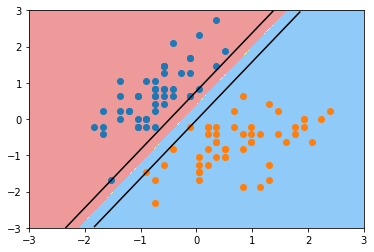

In [76]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1])
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1])
plt.show()

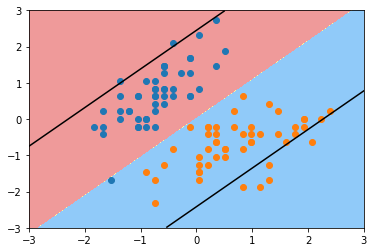

In [77]:
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1])
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1])
plt.show()

# SVM使用多项式特征

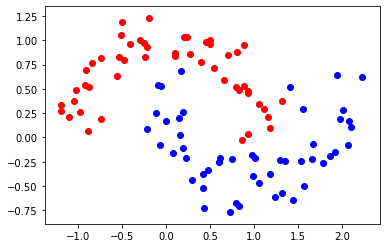

In [78]:
#生成数据集

X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [99]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [100]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linear_SVC", LinearSVC(C=C))
    ])

In [102]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_SVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

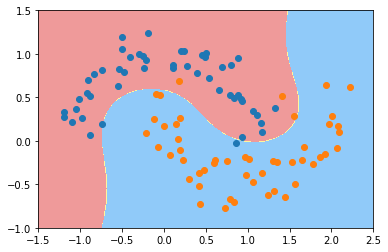

In [105]:
plot_decision_boundary(poly_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## 使用SVM多项式核

In [106]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernel", SVC(kernel='poly', degree=degree, C=C))
    ])

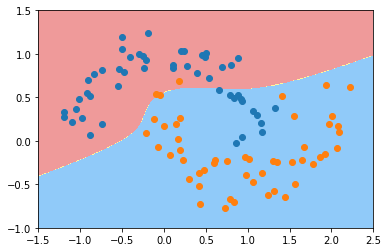

In [107]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)
plot_decision_boundary(poly_kernel_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

# 核函数

### 把低维样本变为高维数据，需要把样本数据$x^{(i)}$进行变形为$x^{\prime(i)}$后点乘。

### 为了降低计算复杂度，采用了核函数这一技巧，只需对$K(x^{(i)},x^{(j)})$进行计算即可

## 多项式核函数

### 依靠升维，使得线性不可分的数据线性可分

### $K(x, y)=(x\cdot y+1)^2$

### $\begin{eqnarray}K(x,y)&=&(\sum_{i=1}^nx_iy_i+1)^2 \\
&=&\sum_{i=1}^n(x_i^2)(y_i^2)+\sum_{i=2}^n\sum_{j=1}^{i-1}(\sqrt2x_ix_j)(\sqrt2y_iy_j)+\sum_{i=1}^n(\sqrt2x_i)(\sqrt2y_i)+1\\
&=&x^{\prime}\cdot y^{\prime}\end{eqnarray}$

### $x^{\prime}=(x_n^2,\ldots,x_1^2,\sqrt2x_nx_{n-1},\ldots,\sqrt2x_n,\ldots,\sqrt2x_1,1)$

### 多项式核函数：$K(x, y)=(x\cdot y+1)^d$

### 线性核函数：$K(x, y)=x\cdot y$
***

## 高斯核函数（RBF核）

### $K(x,y)=e^{-\gamma||x-y||^2}\quad$ $\gamma$越大，高斯分布越窄，相当于模型复杂度

### 将每一个样本点映射到一个无穷维的特征空间：m\*n的数据映射成m\*m的数据

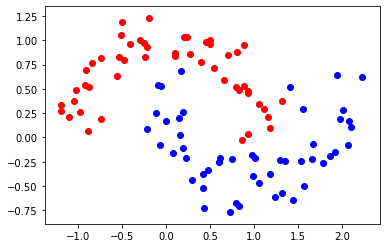

In [108]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [111]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernel", SVC(kernel='rbf', gamma=gamma))
    ])

In [112]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernel',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1.0, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

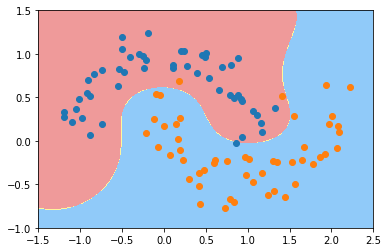

In [113]:
plot_decision_boundary(svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

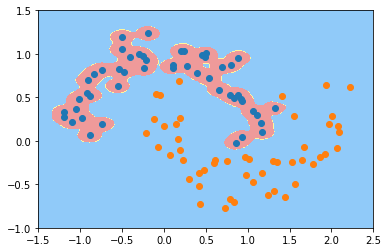

In [114]:
svc_100 = RBFKernelSVC(gamma=100)
svc_100.fit(X,y)
plot_decision_boundary(svc_100, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

#高斯分布变窄，可以理解为俯视图，范围收紧

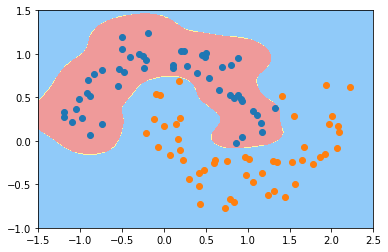

In [115]:
svc_10 = RBFKernelSVC(gamma=10)
svc_10.fit(X,y)
plot_decision_boundary(svc_10, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

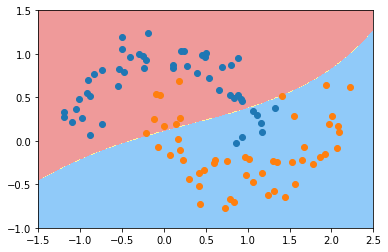

In [116]:
svc_01 = RBFKernelSVC(gamma=0.1)
svc_01.fit(X,y)
plot_decision_boundary(svc_01, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

# SVM解决回归问题（SVR）

### 思路：margin区间内，样本数据点越多越好

In [117]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [120]:
from sklearn.svm import LinearSVR

def StandardLinearSVR(epsilon=0.1): #epsilon相当于d
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("linearSVR",LinearSVR(epsilon=epsilon))
    ])

In [121]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.6355773321325022